<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/NLP/7_4_Gaussian_Mixture_Models_(GMM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###7.4. Gaussian Mixture Models (GMM)

#### 1. Введение

Gaussian Mixture Models (GMM) – это вероятностная модель, которая используется для представления распределения данных в виде комбинации нескольких гауссовых распределений. GMM широко применяются в различных задачах машинного обучения, таких как кластеризация, детектирование аномалий, а также в задачах обработки естественного языка (NLP), например, для темы моделирования текстов, извлечения признаков и многого другого.

#### 2. Теоретические основы GMM

GMM представляет собой вероятностную модель, в которой данные рассматриваются как образцы, взятые из смеси нескольких гауссовских распределений. Формально, вероятностная плотность смеси определяется следующим образом:

$$
p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k),
$$

где:
- $ \mathbf{x}$ – вектор наблюдений,
- $ K$ – количество компонент смеси,
- $ \pi_k$ – априорная вероятность (вес) $k$-й компоненты, такая что $\sum_{k=1}^{K} \pi_k = 1$ и $ 0 \leq \pi_k \leq 1$,
- $ \mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)$ – многомерное гауссовское распределение с математическим ожиданием $ \boldsymbol{\mu}_k$ и ковариационной матрицей $ \boldsymbol{\Sigma}_k$, задаваемое формулой:

$$
\mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}_k|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x} - \boldsymbol{\mu}_k) \right),
$$

где $ d$ – размерность пространства признаков.

#### 3. EM-алгоритм для оценки параметров GMM

Чтобы обучить GMM, необходимо определить параметры $ \{ \pi_k, \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k \}_{k=1}^K$. Поскольку прямое максимизирование правдоподобия часто невозможно, используется Expectation-Maximization (EM) алгоритм. EM-алгоритм состоит из двух шагов: E-шаг (Expectation) и M-шаг (Maximization).

##### 3.1. E-шаг

На E-шаге вычисляется "завуалированное" распределение скрытых переменных. Для каждого наблюдения $ \mathbf{x}_n$, мы вычисляем ответственность $ \gamma_{nk}$ компоненты $ k$ за это наблюдение:

$$
\gamma_{nk} = \frac{\pi_k \mathcal{N}(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(\mathbf{x}_n \mid \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j)}.
$$

Здесь $ \gamma_{nk}$ интерпретируется как вероятность того, что точка $ \mathbf{x}_n$ была сгенерирована компонентой $ k$.

##### 3.2. M-шаг

На M-шаге обновляются параметры модели, используя рассчитанные вероятности ответственности:

- Обновление весов:

$$
\pi_k = \frac{1}{N} \sum_{n=1}^{N} \gamma_{nk},
$$

где $ N$ – общее количество наблюдений.

- Обновление среднего:

$$
\boldsymbol{\mu}_k = \frac{\sum_{n=1}^{N} \gamma_{nk} \mathbf{x}_n}{\sum_{n=1}^{N} \gamma_{nk}}.
$$

- Обновление ковариационной матрицы:

$$
\boldsymbol{\Sigma}_k = \frac{\sum_{n=1}^{N} \gamma_{nk} (\mathbf{x}_n - \boldsymbol{\mu}_k)(\mathbf{x}_n - \boldsymbol{\mu}_k)^T}{\sum_{n=1}^{N} \gamma_{nk}}.
$$

Этот процесс E-шагов и M-шагов повторяется до сходимости, когда параметры перестают существенно изменяться.

#### 4. GMM в задачах NLP

Теперь рассмотрим, как GMM можно применять в задачах NLP. В задачах обработки текстов ГММ используются для моделирования вероятностных распределений вектора признаков, представляющих текст. Эти признаки могут включать:

- Векторные представления слов (Word Embeddings),
- Тематические признаки,
- Статистики текста (TF-IDF, частота появления слов).

##### 4.1. Кластеризация текстов

GMM могут использоваться для кластеризации текстов, где текстовые данные представлены как векторы признаков (например, в виде векторных представлений слов или предложений). В отличие от K-means, GMM позволяет учитывать форму и размер кластеров, что делает его более гибким для задач, где кластеры могут иметь различную дисперсию.

##### 4.2. Тематическое моделирование

GMM можно применять в тематическом моделировании, где текстовая коллекция рассматривается как смесь различных тем. Каждая тема представляется многомерным гауссовым распределением, а смесь этих распределений описывает вероятностное распределение слов в тексте.

##### 4.3. Детектирование аномалий в текстах

В задачах обнаружения аномалий GMM можно использовать для нахождения отклонений в текстовых данных. Модель обучается на нормальных данных, а затем вычисляется вероятность того, что новые данные принадлежат к распределению, описанному моделью. Низкая вероятность может свидетельствовать о наличии аномалии.

#### 5. Математические основы и примеры вычислений

Рассмотрим несколько примеров применения GMM в задачах NLP и вычисления связанных с этим величин.

##### 5.1. Пример 1: Кластеризация векторов слов

Пусть у нас есть набор векторов слов $ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N$, каждый из которых имеет размерность $ d$. Предположим, что эти векторы можно представить в виде смеси $ K$ гауссовских распределений.

1. Начальная инициализация: Зададим начальные значения параметров $ \pi_k$, $ \boldsymbol{\mu}_k$ и $ \boldsymbol{\Sigma}_k$.

2. E-шаг: Рассчитаем ответственности $ \gamma_{nk}$ для каждого вектора $ \mathbf{x}_n$:

$$
\gamma_{nk} = \frac{\pi_k \mathcal{N}(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(\mathbf{x}_n \mid \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j)}.
$$

3. M-шаг: Обновим параметры:

$$
\pi_k = \frac{1}{N} \sum_{n=1}^{N} \gamma_{nk},
$$

$$
\boldsymbol{\mu}_k = \frac{\sum_{n=1}^{N} \gamma_{nk} \mathbf{x}_n}{\sum_{n=1}^{N} \gamma_{nk}},
$$

$$
\boldsymbol{\Sigma}_k = \frac{\sum_{n=1}^{N} \gamma_{nk} (\mathbf{x}_n - \boldsymbol{\mu}_k)(\mathbf{x}_n - \boldsymbol{\mu}_k)^T}{\sum_{n=1}^{N} \gamma_{nk}}.
$$

4. Повторение: Выполняем шаги 2 и 3, пока изменение логарифма правдоподобия не станет незначительным.

##### 5.2. Пример 2: Тематическое моделирование

Для тематического моделирования, где каждую тему можно интерпретировать как компоненту GMM, мы можем применить аналогичный подход:

- Представление документов: Представляем каждый документ в виде вектора признаков, например, вектором средних векторов слов, составляющих документ.
- Применение GMM: Выполняем кластеризацию с использованием GMM для определения вероятности принадлежности документа к каждой теме (компоненте).

#### 6. Вычисление градиентов и оптимизация

Для оптимизации параметров GMM, можно вычислить градиенты по параметрам $ \pi_k$, $ \boldsymbol{\mu}_k$, $ \boldsymbol{\Sigma}_k$ с использованием методов градиентного спуска или других оптимизационных алгоритмов.

Для градиентов:

- Для весов $ \pi_k$:

$$
\frac{\partial \mathcal{L}}{\partial \pi_k} = \sum_{n=1}^{N} \left( \gamma_{nk} - \pi_k \right).
$$

- Для среднего $ \boldsymbol{\mu}_k$:

$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\mu}_k} = \sum_{n=1}^{N} \gamma_{nk} (\mathbf{x}_n - \boldsymbol{\mu}_k).
$$

- Для ковариационной матрицы $ \boldsymbol{\Sigma}_k$:

$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\Sigma}_k} = \sum_{n=1}^{N} \gamma_{nk} \left( (\mathbf{x}_n - \boldsymbol{\mu}_k)(\mathbf{x}_n - \boldsymbol{\mu}_k)^T - \boldsymbol{\Sigma}_k \right).
$$

#### 7. Заключение

GMM представляют собой мощный инструмент для решения разнообразных задач в области обработки естественного языка, благодаря своей способности моделировать сложные распределения данных. Использование EM-алгоритма позволяет эффективно обучать модель, а её гибкость позволяет справляться с многими типами данных и структур.

В завершение, GMM и их применение в NLP открывают множество возможностей для более глубокого анализа и обработки текстовых данных, что делает их важным компонентом в арсенале специалистов по данным и исследователей в области искусственного интеллекта.



### Пример 1: Кластеризация текстов с использованием GMM

#### 1. Задание

Допустим, у нас есть набор текстов, который мы представили в виде векторов признаков (например, TF-IDF векторы). Рассмотрим 6 векторов, каждый из которых представляет документ:

$$
\begin{align*}
\mathbf{x}_1 & = [0.2, 0.4, 0.4] \\
\mathbf{x}_2 & = [0.5, 0.3, 0.2] \\
\mathbf{x}_3 & = [0.6, 0.1, 0.3] \\
\mathbf{x}_4 & = [0.9, 0.05, 0.05] \\
\mathbf{x}_5 & = [0.1, 0.5, 0.4] \\
\mathbf{x}_6 & = [0.7, 0.2, 0.1] \\
\end{align*}
$$

Мы хотим кластеризовать эти документы в 2 группы с использованием GMM.

#### 2. Шаг 1: Инициализация

Сначала мы инициализируем параметры модели. Предположим, что у нас 2 компоненты (кластеров), и начальные параметры заданы следующим образом:

- $ \pi_1 = 0.5$, $ \pi_2 = 0.5$
- Средние:
  - $ \boldsymbol{\mu}_1 = [0.4, 0.3, 0.3]$
  - $ \boldsymbol{\mu}_2 = [0.6, 0.1, 0.3]$
- Ковариационные матрицы:
  - $ \boldsymbol{\Sigma}_1 = \begin{bmatrix} 0.1 & 0 & 0 \\ 0 & 0.1 & 0 \\ 0 & 0 & 0.1 \end{bmatrix}$
  - $ \boldsymbol{\Sigma}_2 = \begin{bmatrix} 0.1 & 0 & 0 \\ 0 & 0.1 & 0 \\ 0 & 0 & 0.1 \end{bmatrix}$

#### 3. Шаг 2: E-шаг

На этом шаге мы вычисляем ответственности $ \gamma_{nk}$ для каждого документа $ \mathbf{x}_n$ и каждой компоненты $ k$.

Формула для ответственности:

$$
\gamma_{nk} = \frac{\pi_k \mathcal{N}(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(\mathbf{x}_n \mid \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j)}.
$$

#### 3.1. Расчет многомерного гауссовского распределения

Выберем, например, первый документ $ \mathbf{x}_1 = [0.2, 0.4, 0.4]$.

Для компоненты 1 ($ k = 1$):

1. Вычисляем:

$$
\mathcal{N}(\mathbf{x}_1 \mid \boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1) = \frac{1}{(2\pi)^{3/2} |\boldsymbol{\Sigma}_1|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x}_1 - \boldsymbol{\mu}_1)^T \boldsymbol{\Sigma}_1^{-1} (\mathbf{x}_1 - \boldsymbol{\mu}_1) \right)
$$

Где $ |\boldsymbol{\Sigma}_1| = 0.001$ (определитель) и

$$
(\mathbf{x}_1 - \boldsymbol{\mu}_1) = [0.2 - 0.4, 0.4 - 0.3, 0.4 - 0.3] = [-0.2, 0.1, 0.1].
$$

Теперь находим

$$
(\mathbf{x}_1 - \boldsymbol{\mu}_1)^T \boldsymbol{\Sigma}_1^{-1} (\mathbf{x}_1 - \boldsymbol{\mu}_1) = \begin{bmatrix} -0.2 & 0.1 & 0.1 \end{bmatrix} \begin{bmatrix} 10 & 0 & 0 \\ 0 & 10 & 0 \\ 0 & 0 & 10 \end{bmatrix} \begin{bmatrix} -0.2 \\ 0.1 \\ 0.1 \end{bmatrix} = 10(-0.2^2 + 0.1^2 + 0.1^2) = 10(0.04 + 0.01 + 0.01) = 10(0.06) = 0.6.
$$

Подставляем это значение:

$$
\mathcal{N}(\mathbf{x}_1 \mid \boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1) = \frac{1}{(2\pi)^{3/2} \sqrt{0.001}} \exp \left( -\frac{0.6}{2} \right) \approx \frac{1}{(2\pi)^{3/2} \times 0.03162} \cdot e^{-0.3} \approx \frac{1}{0.06283} \cdot 0.74082 \approx 11.803 \text{ (приближенно)}.
$$

Для компоненты 2 ($ k = 2$), аналогично:

1. Вычисляем:

$$
\mathcal{N}(\mathbf{x}_1 \mid \boldsymbol{\mu}_2, \boldsymbol{\Sigma}_2) = \frac{1}{(2\pi)^{3/2} |\boldsymbol{\Sigma}_2|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x}_1 - \boldsymbol{\mu}_2)^T \boldsymbol{\Sigma}_2^{-1} (\mathbf{x}_1 - \boldsymbol{\mu}_2) \right)
$$

$$
(\mathbf{x}_1 - \boldsymbol{\mu}_2) = [0.2 - 0.6, 0.4 - 0.1, 0.4 - 0.3] = [-0.4, 0.3, 0.1].
$$

Теперь находим

$$
(\mathbf{x}_1 - \boldsymbol{\mu}_2)^T \boldsymbol{\Sigma}_2^{-1} (\mathbf{x}_1 - \boldsymbol{\mu}_2) = \begin{bmatrix} -0.4 & 0.3 & 0.1 \end{bmatrix} \begin{bmatrix} 10 & 0 & 0 \\ 0 & 10 & 0 \\ 0 & 0 & 10 \end{bmatrix} \begin{bmatrix} -0.4 \\ 0.3 \\ 0.1 \end{bmatrix} = 10(-0.4^2 + 0.3^2 + 0.1^2) = 10(0.16 + 0.09 + 0.01) = 10(0.26) = 2.6.
$$

Подставляем это значение:

$$
\mathcal{N}(\mathbf{x}_1 \mid \boldsymbol{\mu}_2, \boldsymbol{\Sigma}_2) = \frac{1}{(2\pi)^{3/2} \sqrt{0.001}} \exp \left( -\frac{2.6}{2} \right) \approx \frac{1}{(2\pi)^{3/2} \times 0.03162} \cdot e^{-1.3} \approx \frac{1}{0.06283} \cdot 0.27353 \approx 4.344 \text{ (приближенно)}.
$$

#### 3.2. Расчет ответственных

Теперь мы можем подставить эти значения в формулу для $ \gamma_{nk}$:

$$
\gamma_{n1} = \frac{0.5 \cdot 11.803}{0.5 \cdot 11.803 + 0.5 \cdot 4.344} = \frac{5.9015}{5.9015 + 2.172} = \frac{5.9015}{8.0735} \approx 0.730.
$$

$$
\gamma_{n2} = \frac{0.5 \cdot 4.344}{0.5 \cdot 11.803 + 0.5 \cdot 4.344} = \frac{2.172}{8.0735} \approx 0.270.
$$

#### 4. Шаг 3: M-шаг

Теперь обновим параметры модели, используя рассчитанные значения $ \gamma_{n1}$ и $ \gamma_{n2}$ для всех документов.

1. Обновление весов:

$$
\pi_1 = \frac{1}{6} \sum_{n=1}^{6} \gamma_{n1}, \quad \pi_2 = \frac{1}{6} \sum_{n=1}^{6} \gamma_{n2}.
$$

2. Обновление средних:

$$
\boldsymbol{\mu}_1 = \frac{\sum_{n=1}^{6} \gamma_{n1} \mathbf{x}_n}{\sum_{n=1}^{6} \gamma_{n1}}, \quad \boldsymbol{\mu}_2 = \frac{\sum_{n=1}^{6} \gamma_{n2} \mathbf{x}_n}{\sum_{n=1}^{6} \gamma_{n2}}.
$$

3. Обновление ковариационных матриц:

$$
\boldsymbol{\Sigma}_1 = \frac{\sum_{n=1}^{6} \gamma_{n1} (\mathbf{x}_n - \boldsymbol{\mu}_1)(\mathbf{x}_n - \boldsymbol{\mu}_1)^T}{\sum_{n=1}^{6} \gamma_{n1}},
$$

$$
\boldsymbol{\Sigma}_2 = \frac{\sum_{n=1}^{6} \gamma_{n2} (\mathbf{x}_n - \boldsymbol{\mu}_2)(\mathbf{x}_n - \boldsymbol{\mu}_2)^T}{\sum_{n=1}^{6} \gamma_{n2}}.
$$

#### 5. Повторение шагов 2 и 3

Повторяем E-шаг и M-шаг, пока изменения в параметрах не станут незначительными.



### Пример 2: Тематическое моделирование с GMM

#### 1. Задание

Предположим, что у нас есть набор из 5 документов, и каждый документ представлен вектором из 2 признаков, описывающих частоты двух различных тем. Векторы документов:

$$
\begin{align*}
\mathbf{x}_1 & = [0.3, 0.7] \\
\mathbf{x}_2 & = [0.1, 0.9] \\
\mathbf{x}_3 & = [0.8, 0.2] \\
\mathbf{x}_4 & = [0.75, 0.25] \\
\mathbf{x}_5 & = [0.4, 0.6] \\
\end{align*}
$$

Мы хотим разделить эти документы на 2 группы с использованием GMM.

#### 2. Шаг 1: Инициализация

Инициализируем параметры модели:

- $ K = 2$ (количество компонент)
- Начальные веса: $ \pi_1 = 0.5$, $ \pi_2 = 0.5$
- Начальные средние:
  - $ \boldsymbol{\mu}_1 = [0.2, 0.8]$
  - $ \boldsymbol{\mu}_2 = [0.7, 0.3]$
- Начальные ковариационные матрицы:
  - $ \boldsymbol{\Sigma}_1 = \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}$
  - $ \boldsymbol{\Sigma}_2 = \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}$

#### 3. E-шаг

Для каждого документа рассчитываем ответственность $ \gamma_{nk}$ для каждой компоненты $ k$. Расчеты аналогичны примеру 1.

#### 4. M-шаг

Обновляем параметры $ \pi_k$, $ \boldsymbol{\mu}_k$, $ \boldsymbol{\Sigma}_k$, используя полученные на E-шаге значения $ \gamma_{nk}$.

#### 5. Повторение шагов 2 и 3

Процесс продолжается до сходимости.


Давайте реализуем оба примера кластеризации с использованием моделей смешивания Гаусса (GMM) в Python с визуализацией результатов. Мы будем использовать библиотеку `sklearn` для создания GMM и `matplotlib` для визуализации.


### Пример 1: Кластеризация текстов с использованием GMM



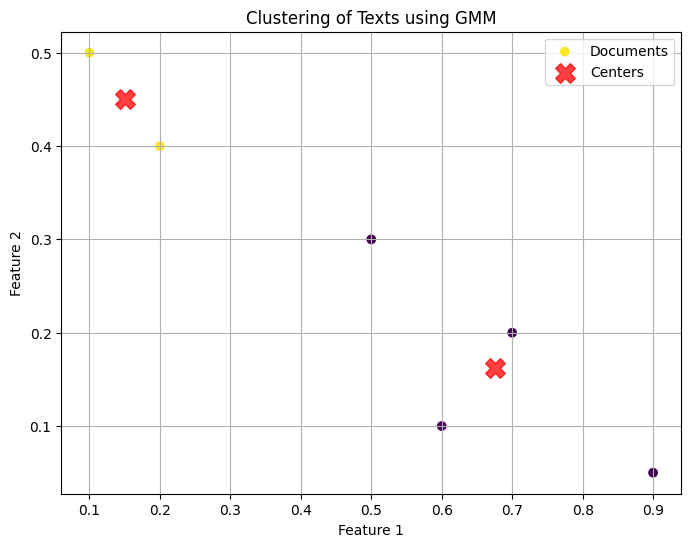

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Данные (вектора документов)
X1 = np.array([
    [0.2, 0.4, 0.4],
    [0.5, 0.3, 0.2],
    [0.6, 0.1, 0.3],
    [0.9, 0.05, 0.05],
    [0.1, 0.5, 0.4],
    [0.7, 0.2, 0.1]
])

# Обучение модели GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X1)

# Получение меток кластеров
labels = gmm.predict(X1)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=labels, cmap='viridis', marker='o', label='Documents')
plt.title('Clustering of Texts using GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Визуализация центров кластеров
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.legend()
plt.grid()
plt.show()



### Пример 2: Тематическое моделирование с GMM


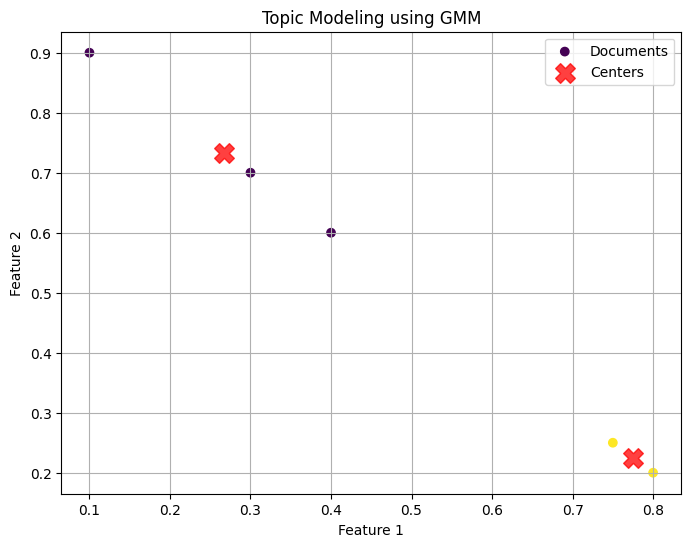

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Данные (вектора тем)
X2 = np.array([
    [0.3, 0.7],
    [0.1, 0.9],
    [0.8, 0.2],
    [0.75, 0.25],
    [0.4, 0.6]
])

# Обучение модели GMM
gmm2 = GaussianMixture(n_components=2, random_state=42)
gmm2.fit(X2)

# Получение меток кластеров
labels2 = gmm2.predict(X2)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=labels2, cmap='viridis', marker='o', label='Documents')
plt.title('Topic Modeling using GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Визуализация центров кластеров
centers2 = gmm2.means_
plt.scatter(centers2[:, 0], centers2[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.legend()
plt.grid()
plt.show()


### Вопросы для самопроверки

1. Что такое модель смешивания Гаусса (GMM) и как она работает?
2. Какова основная идея алгоритма EM (Expectation-Maximization) для GMM?
3. Какова роль весов (π) в GMM?
4. В чем разница между GMM и K-средними?
5. Как GMM обрабатывает многомерные данные?
6. Какие параметры GMM необходимо инициализировать перед обучением?
7. Что такое ответственность (γ) в контексте GMM и как она вычисляется?
8. Каковы основные шаги в E-шаге алгоритма EM?
9. Как GMM обновляет параметры во время M-шага?
10. Почему важно правильно инициализировать параметры GMM?
11. Как можно использовать GMM для кластеризации текстовых данных?
12. Как GMM может быть применен в задачах тематического моделирования?
13. Какие преимущества и недостатки GMM по сравнению с другими методами кластеризации?
14. Каков принцип работы многомерного гауссовского распределения?
15. Как можно визуализировать результаты кластеризации, выполненной с помощью GMM?

### Задачи для самостоятельной работы

1. Реализуйте GMM для простого двумерного набора данных и визуализируйте результаты.
2. Исследуйте, как влияет количество компонент GMM на качество кластеризации, варьируя количество компонент от 1 до 5.
3. Проведите кластеризацию текстовых документов, используя TF-IDF векторы и GMM.
4. Сравните результаты GMM и K-средних на одном и том же наборе данных.
5. Проанализируйте, как различные методы инициализации параметров (например, случайная инициализация) влияют на результаты GMM.
6. Визуализируйте плотности вероятности для двух компонент GMM.
7. Реализуйте GMM для задачи многоклассовой классификации, используя Iris Dataset.
8. Сравните GMM с другими методами кластеризации, такими как DBSCAN и иерархическая кластеризация, на одном наборе данных.
9. Исследуйте применение GMM в задаче распознавания речи или анализа текстов.
10. Постройте модель GMM для анализа тональности текстов (положительная, отрицательная, нейтральная).
11. Примените GMM для кластеризации изображений на основе их цветовых характеристик.
12. Создайте GMM для сегментации пользователей в интернет-магазине на основе их поведения.
13. Используя GMM, проанализируйте, как изменяется распределение тем в наборах новостей по времени.
14. Проведите гипотетическое тестирование значимости различий между кластерами, полученными с помощью GMM.
15. Реализуйте алгоритм GMM с использованием собственных вычислений градиентов и обновления параметров.
16. Изучите и визуализируйте влияние разных функций активации на результаты GMM.
17. Попробуйте адаптировать GMM для работы с негауссовскими распределениями.
18. Рассмотрите возможность использования GMM для аномального детектирования в временных рядах.
19. Реализуйте алгоритм GMM на других языках программирования (например, R или MATLAB).
20. Исследуйте, как нормализация данных перед обучением GMM влияет на результаты.
21. Проанализируйте, как изменения в размерах выборки влияют на сходимость и стабильность GMM.
22. Создайте и протестируйте модель GMM для задач рекомендаций (например, фильтрация по содержимому).
23. Изучите использование GMM в задачах биоинформатики (например, для анализа последовательностей ДНК).
24. Реализуйте многомерный GMM для распознавания лиц на основе характеристик изображений.
25. Сравните GMM с глубинными нейронными сетями для задач кластеризации и тематического моделирования.
26. Исследуйте, как GMM может быть использован в обработке сигналов.
27. Постройте модель GMM для анализа движения пользователей на сайте.
28. Проанализируйте использование GMM в задачах медицинской диагностики (например, для группировки пациентов).
29. Изучите алгоритмы для выбора оптимального количества компонент GMM (например, с использованием BIC или AIC).
30. Реализуйте метод проверки устойчивости GMM с использованием бутстрепа.
